# CS 136 day03: Gamma Functions

A brief interactive primer on the Gamma function


In [ ]:
import numpy as np
from scipy.special import gamma, gammaln, factorial

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

# Gamma function

#### Intuitive motivation

We want a function over the reals that *smoothly* interpolates between factorial values.

$$
\Gamma(x) = \begin{cases}
(x+1)! & ~\text{if x is integer} \\
\text{smoothed real}    & ~\text{otherwise}
\end{cases}
$$

#### Formal definition: 

$$
\Gamma(x) = \int_{0}^{\infty} u^{x-1} e^{-u} du
$$

#### Standard Numerical implementations

Thankfully, you can use the built-in functions from SciPy to compute this function:

* `gamma(\cdot)` computes the gamma function $\Gamma(x)$
* * See <https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html>
* `gammaln(\cdot)` computes the natural log of the gamma function $\log \Gamma(x)$
* * See <https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.gammaln.html>
* * Will often be more numerically stable than doing `np.log(gamma(\cdot))`

# Tabular understanding of the Gamma function

In [ ]:
print("     x    factorial(x-1)      gamma(x)   log(gamma(x))")
for x in [0.0, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]:
    print("% 9.2f     % 9.3f      % 9.3f       % 9.3f" % (
        x,
        factorial(x-1) if x == np.round(x,0) else np.nan,
        gamma(x), gammaln(x)))

     x    factorial(x-1)      gamma(x)   log(gamma(x))
     0.00         0.000            inf             inf
     0.50           nan          1.772           0.572
     1.00         1.000          1.000           0.000
     1.50           nan          0.886          -0.121
     2.00         1.000          1.000           0.000
     3.00         2.000          2.000           0.693
     4.00         6.000          6.000           1.792
     5.00        24.000         24.000           3.178
     6.00       120.000        120.000           4.787
     7.00       720.000        720.000           6.579


# Plot of the Gamma function

Note that it is defined for all real valued inputs, both above and below zero.

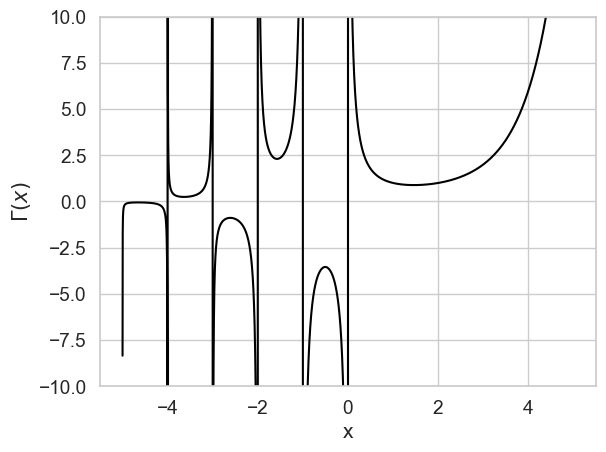

In [ ]:
x_G = np.linspace(-5, 5, 10000)
plt.plot(x_G, gamma(x_G), 'k-');

ax = plt.gca()
ax.set_ylim([-10, 10])
ax.set_xlabel('x')
ax.set_ylabel('$\Gamma(x)$');

# Plot of the Gamma function, focusing on *non-negative* inputs

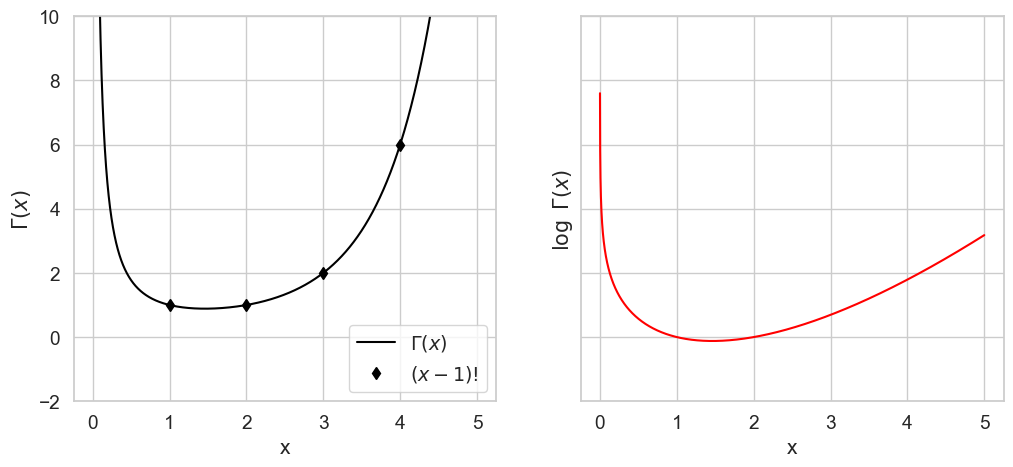

In [ ]:
x_G = np.linspace(0, 5, 10000)
xint_G = np.arange(1, 6)

_, axgrid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 5));
axgrid[0].plot(x_G, gamma(x_G), 'k-', label='$\Gamma(x)$');
axgrid[0].plot(xint_G, factorial(xint_G-1), 'kd', label='$(x-1)!$');

axgrid[1].plot(x_G, gammaln(x_G), 'r-', label='$log \Gamma(x)$')
axgrid[1].set_ylim([-2, 10])
axgrid[0].set_xlabel('x')
axgrid[1].set_xlabel('x')
axgrid[0].set_ylabel('$\Gamma(x)$')
axgrid[1].set_ylabel('$\log ~ \Gamma(x)$')
axgrid[0].legend(loc='lower right')

plt.savefig('gamma_and_loggamma.pdf', bbox_inches='tight', pad_inches=0);

# How fast do $\Gamma(x)$ values grow as x increases?

Very fast! This is why using the `gammaln` function is so important in practice. We should work directly in logspace to avoid overflow, which can easily happen for inputs a bit larger than x=10

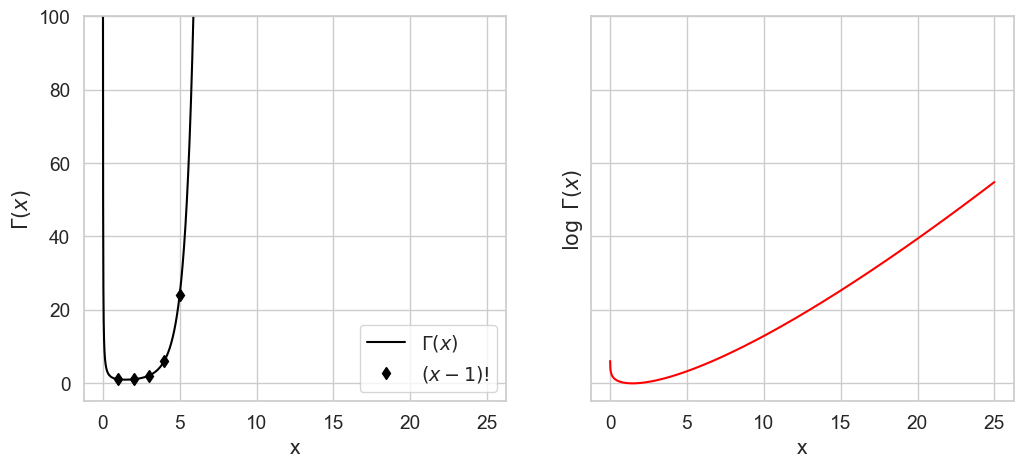

In [ ]:
x_G = np.linspace(0, 25, 10000)
xint_G = np.arange(1, 6)

_, axgrid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 5));
axgrid[0].plot(x_G, gamma(x_G), 'k-', label='$\Gamma(x)$');
axgrid[0].plot(xint_G, factorial(xint_G-1), 'kd', label='$(x-1)!$');

axgrid[1].plot(x_G, gammaln(x_G), 'r-', label='$log \Gamma(x)$')
axgrid[1].set_ylim([-5, 100])
axgrid[0].set_xlabel('x')
axgrid[1].set_xlabel('x')
axgrid[0].set_ylabel('$\Gamma(x)$')
axgrid[1].set_ylabel('$\log ~ \Gamma(x)$')
axgrid[0].legend(loc='lower right');

# Gamma function of integer inputs 0, 1, 2, ....

In [ ]:
print("     x      gamma(x)  log(gamma(x))")
for x in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]:
    print("% 9.2f  % 9.3f    % 9.3f" % (x, gamma(x), gammaln(x)))

     x      gamma(x)  log(gamma(x))
     0.00        inf          inf
     1.00      1.000        0.000
     2.00      1.000        0.000
     3.00      2.000        0.693
     4.00      6.000        1.792
     5.00     24.000        3.178
     6.00    120.000        4.787


# For non-negative integer inputs, Gamma(x+1) equals x! (x factorial)

$$
\Gamma(x+1) = x! \quad x \geq 0
$$

In [ ]:
print("     x      factorial(x)  log(factorial(x))")
for x in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]:
    print("% 9.2f  % 9.3f    % 9.3f" % (x, factorial(x), np.log(factorial(x))))

     x      factorial(x)  log(factorial(x))
     0.00      1.000        0.000
     1.00      1.000        0.000
     2.00      2.000        0.693
     3.00      6.000        1.792
     4.00     24.000        3.178
     5.00    120.000        4.787
     6.00    720.000        6.579


# Gamma(x) obeys a recursive relation

$$
\Gamma(x+1) = x \Gamma(x), \qquad \forall x > 0
$$

In [ ]:
print("     x      gamma(x+1)  x * gamma(x)")
for x in [0.1, 0.5, 0.99, 1.01, 2.5, 5.9]:
    print("% 9.2f    % 9.3f     % 9.3f" % (x, gamma(x+1), gamma(x)*x))

     x      gamma(x+1)  x * gamma(x)
     0.10        0.951         0.951
     0.50        0.886         0.886
     0.99        0.996         0.996
     1.01        1.004         1.004
     2.50        3.323         3.323
     5.90      597.494       597.494


This last fact is a useful identity for several derivations we'll do